##**Product Recommendation (Classification)**

In [1]:
# !pip install --upgrade tensorflow

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("customer_purchase_data.csv")
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [4]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


##**Data Preprocessing**

In [6]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [7]:
df.shape

(1500, 9)

In [8]:
missing_values = df.isnull().sum()

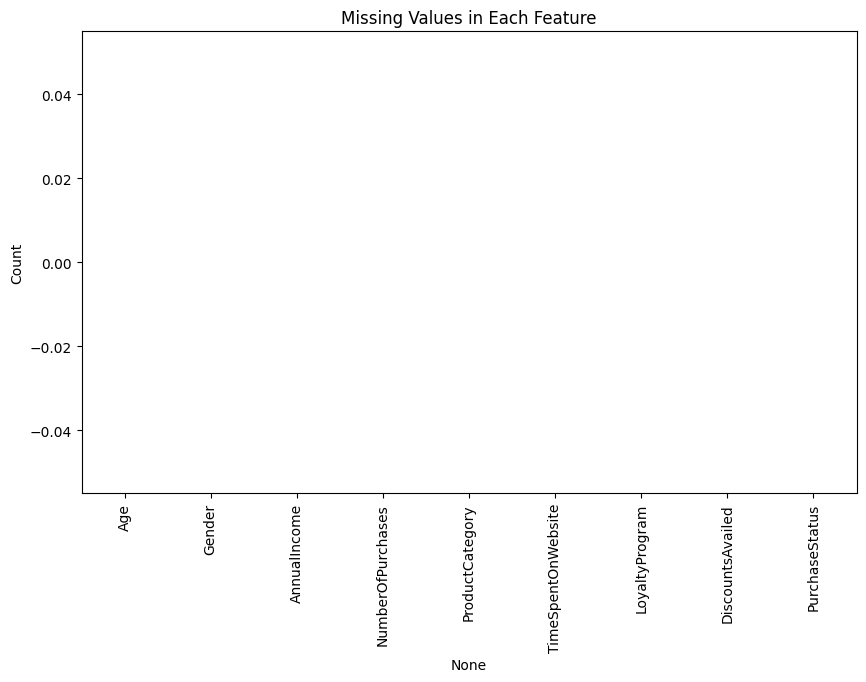

In [9]:
import seaborn as sns
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title("Missing Values in Each Feature")
plt.ylabel("Count")
plt.show()

In [10]:
df.fillna(df.mean(), inplace=True)  # Fill missing values

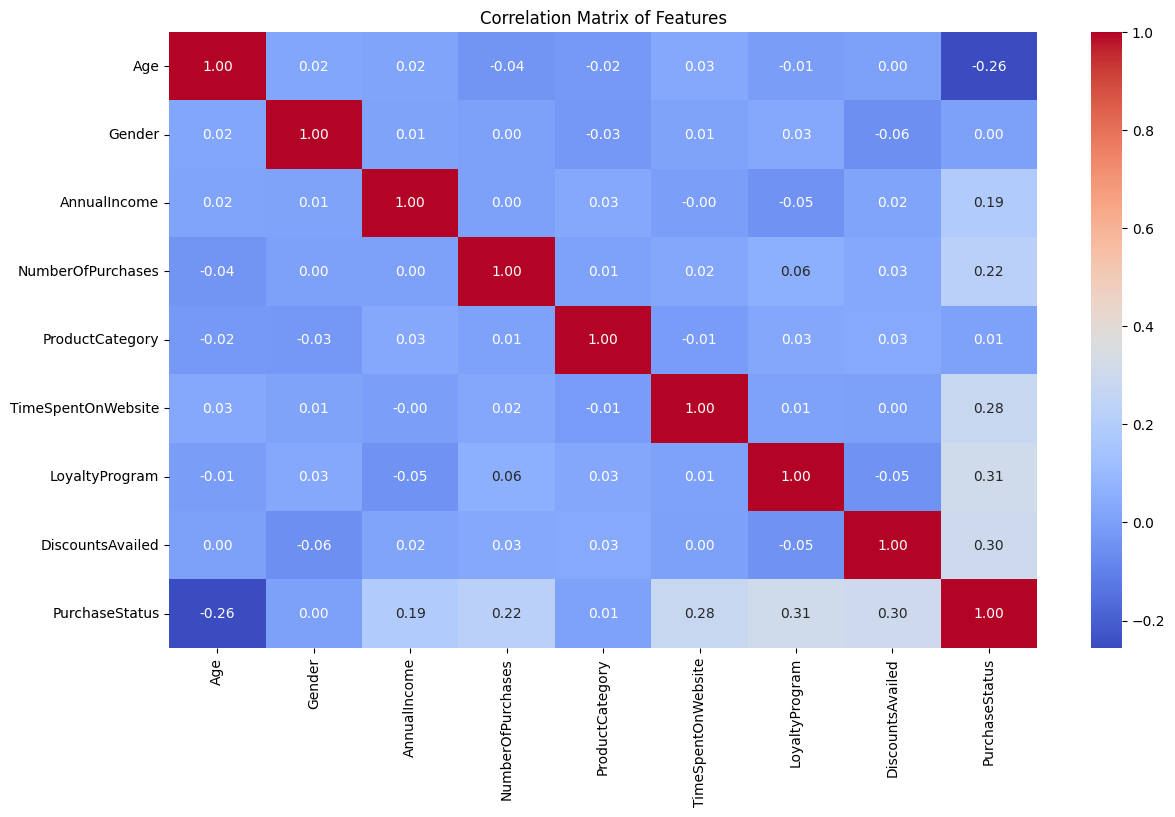

In [11]:
# Correlation Matrix to understand relationships
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()

### **Feature Selection**

In [12]:
target = "PurchaseStatus"  # Replace with your target column
X = df.drop(columns=[target]).values  # Features
y = df[target].values  # Target (binary: 0/1)

In [13]:
# Convert the target variable into binary labels
y = (y > 0).astype(int)

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Scale data for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##**Train Neural Network Model for Classification**

In [16]:
# Original Model Definition
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

d:\Python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# Train the model without class weights
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
    )

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5310 - loss: 0.7121 - val_accuracy: 0.7458 - val_loss: 0.5996
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7005 - loss: 0.6028 - val_accuracy: 0.7917 - val_loss: 0.5178
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7533 - loss: 0.5306 - val_accuracy: 0.8000 - val_loss: 0.4605
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8027 - loss: 0.4759 - val_accuracy: 0.8083 - val_loss: 0.4321
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7932 - loss: 0.4554 - val_accuracy: 0.7917 - val_loss: 0.4207
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7928 - loss: 0.4522 - val_accuracy: 0.8125 - val_loss: 0.4161
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8145 - loss: 0.4217 - val_accuracy: 0.8167 - val_loss: 0.4154
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8020 - loss: 0.4249 - val_accuracy: 0.8167 

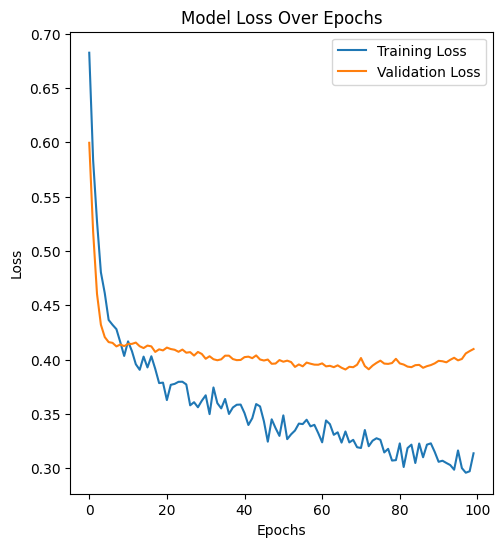

In [19]:
# Plotting training and validation loss/accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

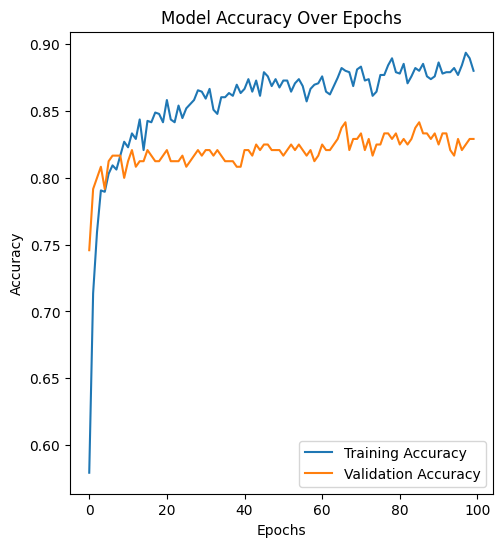

In [20]:
#validation loss/accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.show()

##**Apply modifications to the model: Handle Class Weights**

In [21]:
# Class weights to handle class imbalance
class_weights = {0: len(y_train) / (2 * np.sum(y_train == 0)), 1: len(y_train) / (2 * np.sum(y_train == 1))}

In [22]:
# Define the modified model with class weights
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [23]:
# Compile the modified model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Train the modified model with class weights
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1, class_weight=class_weights)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5762 - loss: 0.6674 - val_accuracy: 0.7750 - val_loss: 0.5551
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7290 - loss: 0.5714 - val_accuracy: 0.7875 - val_loss: 0.4818
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7718 - loss: 0.4991 - val_accuracy: 0.7917 - val_loss: 0.4306
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7974 - loss: 0.4551 - val_accuracy: 0.7917 - val_loss: 0.4171
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8166 - loss: 0.4357 - val_accuracy: 0.8083 - val_loss: 0.4049
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7834 - loss: 0.4878 - val_accuracy: 0.8000 - val_loss: 0.4014
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8362 - loss: 0.4107 - val_accuracy: 0.8000 - val_loss: 0.3980
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8130 - loss: 0.4361 - val_accuracy: 0.80

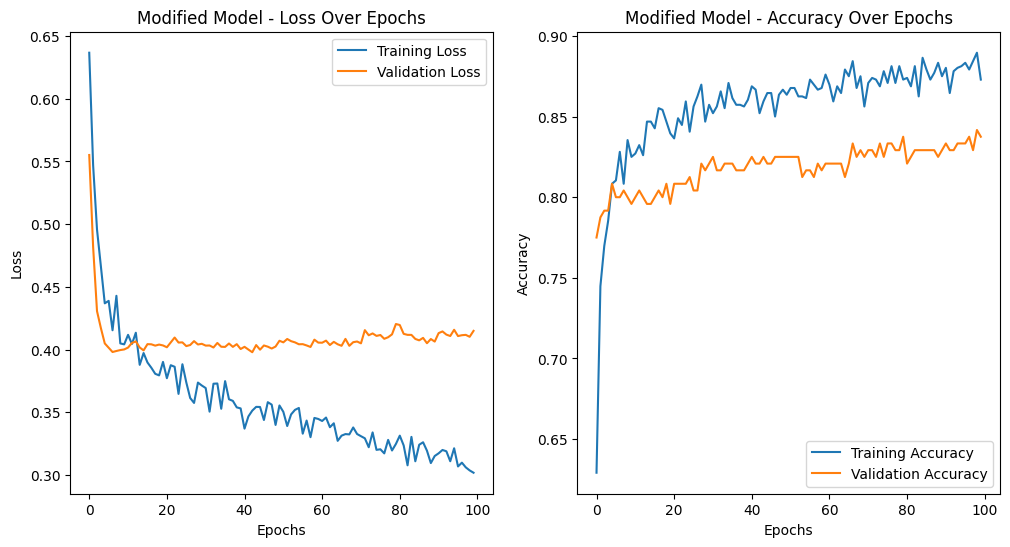

In [25]:
# Plotting training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Modified Model - Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Modified Model - Accuracy Over Epochs')
plt.legend()
plt.show()

##**Evaluate on Testing Data After Modifications**

In [26]:
# Evaluate the modified model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nModified Model - Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Modified Model - Test Loss: 0.3774212896823883, Test Accuracy: 0.8733333349227905


##**Use the model to make predictions on unseen examples**

In [27]:
# Generate predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [28]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       172
           1       0.88      0.82      0.85       128

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



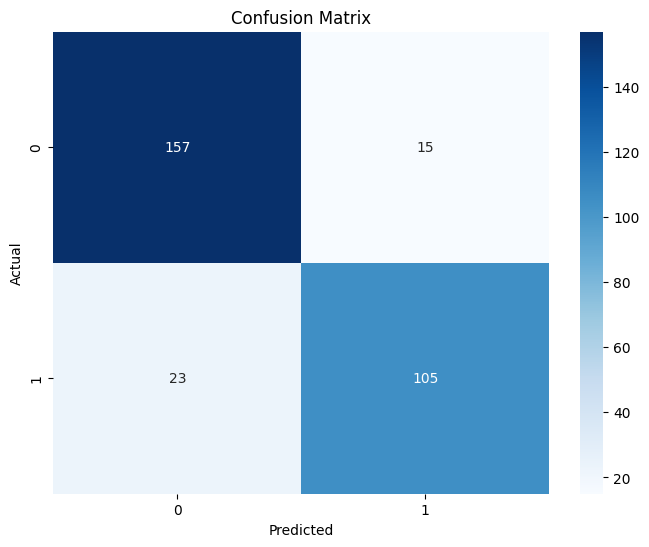

In [29]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##**Feature Importance (Using Permutation Importance)**

In [30]:
from sklearn.inspection import permutation_importance

# Calculate Permutation Importance for Regression
permutation_importance_results = permutation_importance(
    model, X_test, y_test, scoring='neg_mean_squared_error'
)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [31]:
# Display Feature Importance
importance_df = pd.DataFrame({
    "Feature": df.drop(columns=[target]).columns,
    "Importance": permutation_importance_results.importances_mean
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:")
print(importance_df)


Feature Importance:
              Feature  Importance
0                 Age    0.092821
7    DiscountsAvailed    0.087628
6      LoyaltyProgram    0.086653
5  TimeSpentOnWebsite    0.085050
2        AnnualIncome    0.057473
3   NumberOfPurchases    0.047679
4     ProductCategory   -0.000292
1              Gender   -0.000674


C:\Users\MANDO\AppData\Local\Temp\ipykernel_7396\930642798.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")


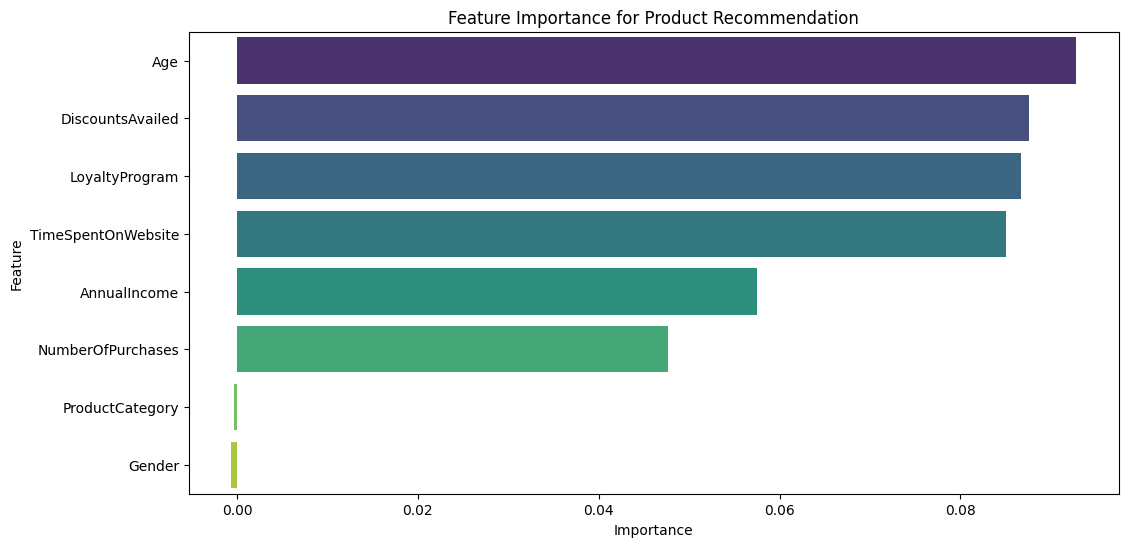

In [32]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance for Product Recommendation")
plt.show()

## **Hyperparameter Tuning with GridSearchCV**

In [33]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [34]:
# Define a function to create the model for GridSearchCV
def create_model(neurons=32, dropout_rate=0.2):
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(neurons // 2, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [35]:
# Wrap the Keras model
model_grid = KerasClassifier(model=create_model, verbose=0)

# Define the grid parameters
param_grid = {
    'model__neurons': [32, 64],
    'model__dropout_rate': [0.2, 0.3],
    'batch_size': [16, 32],
    'epochs': [50]
}

In [36]:
# Grid search
grid = GridSearchCV(estimator=model_grid, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid.fit(X_train, y_train)

d:\Python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Python\Lib\site-packages\keras\src\layer

In [37]:
# Display the best parameters
print(f"\nBest Parameters: {grid_result.best_params_}")


Best Parameters: {'batch_size': 32, 'epochs': 50, 'model__dropout_rate': 0.2, 'model__neurons': 64}


##**Visualization of Weights and Biases After Training**

In [38]:
# Accessing the weights and biases of the best model

weights, biases = model.layers[0].get_weights()


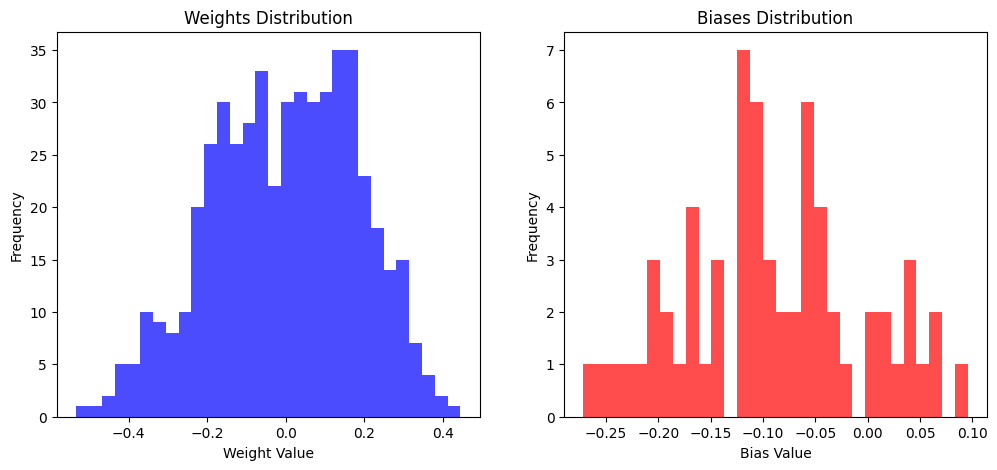

In [39]:
# Visualization of weights and biases
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(weights.flatten(), bins=30, color='blue', alpha=0.7)
ax1.set_title('Weights Distribution')
ax1.set_xlabel('Weight Value')
ax1.set_ylabel('Frequency')

ax2.hist(biases.flatten(), bins=30, color='red', alpha=0.7)
ax2.set_title('Biases Distribution')
ax2.set_xlabel('Bias Value')
ax2.set_ylabel('Frequency')

plt.show()